# Problem 1

Intuitively, we know from Curie principle that the electric field inside a uniformly charged spherical shell will be zero. The
field outside, however, is the same as that due to a point charge $Q$ located at the center of
the shell.

The theoretical derivation is as follows. $\mathbf{E}$ is in the $z$ direction. The infinitesimal charge element is, 
$$d q=\sigma d a=\sigma R^2 \sin \theta d \theta d \phi$$
The formulas linking the coordinates are
$$
\begin{aligned}
&r^2=R^2+z^2-2 R z \cos \theta \\
&\cos \psi=\frac{z-R \cos \theta}{r}
\end{aligned}
$$
And the expression for the field is:

$\begin{aligned} E_z &=\frac{1}{4 \pi \epsilon_0} \int \frac{\sigma R^2 \sin \theta d \theta d \phi(z-R \cos \theta)}{\left(R^2+z^2-2 R z \cos \theta\right)^{3 / 2}} . \quad \int d \phi= 2\pi\\ &=\frac{1}{4 \pi \epsilon_0}\left(2 \pi R^2 \sigma\right) \int_0^\pi \frac{(z-R \cos \theta) \sin \theta}{\left(R^2+z^2-2 R z \cos \theta\right)^{3 / 2}} d \theta \\ &=\frac{1}{4 \pi \epsilon_0}\left(2 \pi R^2 \sigma\right) \int_{-1}^1 \frac{z-R u}{\left(R^2+z^2-2 R z u\right)^{3 / 2}} d u . \\ &=\frac{1}{4 \pi \epsilon_0}\left(2 \pi R^2 \sigma\right)\left[\frac{1}{z^2} \frac{z u-R}{\sqrt{R^2+z^2-2 R z u}}\right]_{-1}^1\\&=\frac{1}{4 \pi \epsilon_0} \frac{2 \pi R^2 \sigma}{z^2}\left\{\frac{(z-R)}{|z-R|}-\frac{(-z-R)}{|z+R|}\right\} \end{aligned}$


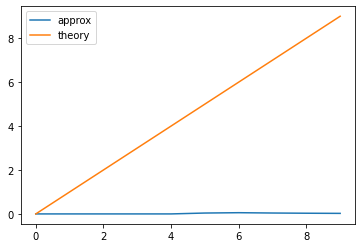

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

R=5

def field(z,R):
    f= lambda u: (z-R*u)/((R**2+z**2-2*R*z*u)**(3/2))
    return f

def theory(z,R):
    g= lambda z: (1/z**2)*(((z-R)/abs(z-R))-((-z-R)/abs(z+R)))
    return z

z=np.arange(0,10,1)

y=[integrate.quad(field(i,R), -1, 1)[0] for i in z]

plt.plot(z,y, label='approx')
plt.plot(z, theory(z,R), label= 'theory')
plt.legend()
plt.show()

Something seems to have gone wrong, I couldn't figure out what it is.

# Problem 3

C:\Users\benkh\anaconda3\lib\site-packages\numpy\polynomial\chebyshev.py:1670: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


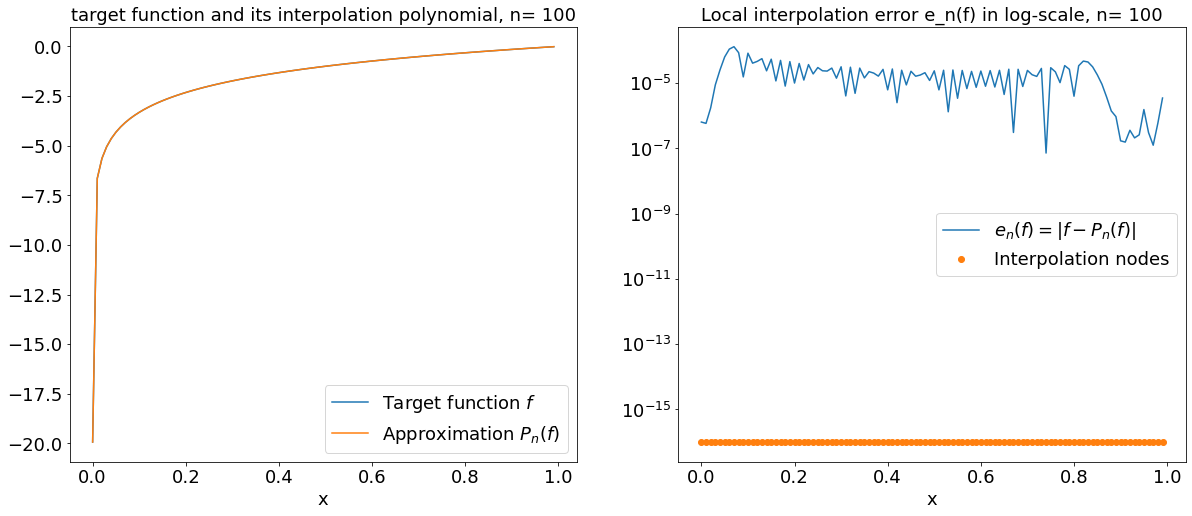

In [112]:
import numpy as np
import matplotlib.pyplot as plt

x_rescale=np.arange(10e-7,1,0.01)
y=np.log2(x_rescale)
c=np.polynomial.chebyshev.chebfit(x_rescale,y, x_rescale.size-1)
y_c=np.polynomial.chebyshev.chebval(x_rescale, c, tensor=True)


n=x_rescale.size


plt.figure(figsize=(20, 8))
    
plt.subplot(121)
plt.plot(x_rescale,np.log2(x_rescale), label='Target function $f$')
plt.plot(x_rescale, y_c, label='Approximation $P_n(f)$')
plt.legend(fontsize = 18)
plt.xlabel('x', fontsize = 18)
plt.tick_params(labelsize=18)
plt.title('target function and its interpolation polynomial, n= %i' %n, fontsize = 18)

plt.subplot(122)
plt.plot(x_rescale, abs(y - y_c), label = '$e_n(f) = |f-P_n(f)|$')
plt.plot(x_rescale, 1e-16*np.ones(x_rescale.size), marker='o', linestyle='', label = 'Interpolation nodes')
plt.legend(fontsize = 18)
plt.xlabel('x', fontsize = 18)
plt.tick_params(labelsize=18)
plt.yscale('log')
plt.title('Local interpolation error e_n(f) in log-scale, n= %i' %n, fontsize = 18)
    
plt.show()





I couldn't get make this more accurate; the error most probably comes from the numpy methods used (i think). Also, using a rescaling yielded false values, which is why I did this.

From the change of basis formula for logarithms, we have that:
$$ln(x)=log_e(x)=\frac{log_2(x)}{log_2(e)}$$
Furthermore, we have that any number can be written as:
$$n=m\times 2^p$$
With $m$ the mantissa and $p$ integer as the exponent
Hence we get:
$$log_2(n)=log_2(m\times 2^p)=p+log_2(m)$$
Since $-1\leq m \leq 1$, we just use the previous section

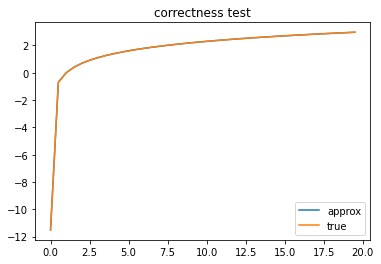

In [113]:
def mylog2(x):
    """
    returns natural log of x
    """
    m,p=np.frexp(x)
    l2_numer= p + np.interp(m, x_rescale,y_c)
    
    m_e,p_e=np.frexp(np.e)
    l2_denom= p_e + np.interp(m_e, x_rescale, y_c)
    
    res=l2_numer/l2_denom
    
    return res



test=np.arange(10e-6,20,0.5)
plt.plot(test, mylog2(test), label='approx')
plt.plot(test, np.log(test), label='true')
plt.title('correctness test')
plt.legend()
plt.show()